Importing Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost
import lightgbm

In [58]:
df= pd.read_csv('meals.csv')
df.head()

,name,type,size,amount,non_veg,veg,queued_orders,chef_experience,workedHrs,time
0,porkKotthu,main,xl,2,1,0,8,senior,3.0,40
1,cilli cuttle fish,appetizer,xl,3,0,1,1,junior,2.0,13
2,mixedFriedRice,main,nm,1,1,0,0,junior,1.0,15
3,garlicBread,bites,nm,5,0,1,1,junior,0.5,13
4,chickenFriedRice,main,xl,4,1,0,0,junior,6.0,40


In [59]:
df.shape

(354, 10)

In [60]:
df.isna().sum()

name               0
type               0
size               0
amount             0
non_veg            0
veg                0
queued_orders      0
chef_experience    0
workedHrs          0
time               0
dtype: int64

Heat Map

In [61]:
import seaborn as sns;

C:\Users\YehanNK\AppData\Local\Temp\ipykernel_15668\3654011136.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


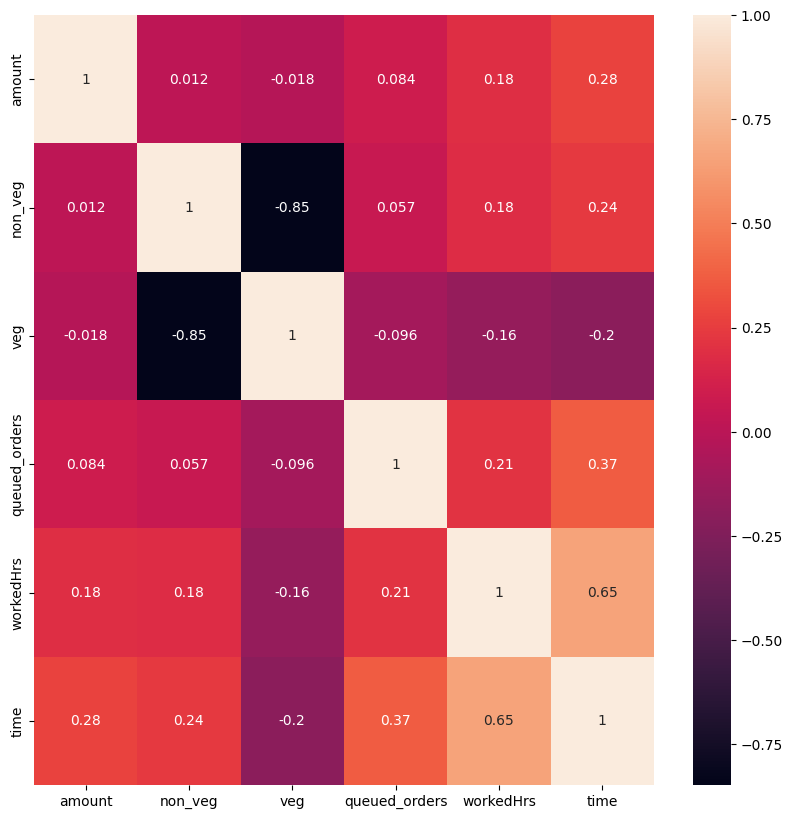

In [62]:
cor=df.corr()
cols=cor.index
plt.figure(figsize=(10,10))
f=sns.heatmap(df[cols].corr(),annot=True)

Removing any Duplicates

In [63]:
df1=df.drop_duplicates()
df1

,name,type,size,amount,non_veg,veg,queued_orders,chef_experience,workedHrs,time
0,porkKotthu,main,xl,2,1,0,8,senior,3.0,40
1,cilli cuttle fish,appetizer,xl,3,0,1,1,junior,2.0,13
2,mixedFriedRice,main,nm,1,1,0,0,junior,1.0,15
3,garlicBread,bites,nm,5,0,1,1,junior,0.5,13
4,chickenFriedRice,main,xl,4,1,0,0,junior,6.0,40
...,...,...,...,...,...,...,...,...,...,...
349,chips,bites,lg,2,0,1,2,senior,2.0,15
350,cuttleFishDevil,bites,lg,2,1,0,2,junior,5.5,55
351,breadPudding,dessert,lg,1,0,1,0,senior,0.5,10
352,Pepper Fish,appetizer,lg,3,1,0,2,junior,1.0,16


In [64]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
349    False
350    False
351    False
352    False
353    False
Length: 350, dtype: bool

In [65]:
df.dtypes

name                object
type                object
size                object
amount               int64
non_veg              int64
veg                  int64
queued_orders        int64
chef_experience     object
workedHrs          float64
time                 int64
dtype: object

In [66]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [67]:
foodNames = df['name']

In [68]:
df4=pd.DataFrame(foodNames)

In [69]:
df4

,name
0,porkKotthu
1,cilli cuttle fish
2,mixedFriedRice
3,garlicBread
4,chickenFriedRice
...,...
349,chips
350,cuttleFishDevil
351,breadPudding
352,Pepper Fish


In [70]:
# df2.columns

Convert the Strings into characters

In [71]:
# change all data type using LabelEncode

df2=df1
pd.options.mode.chained_assignment = None
label_encoders = {}
categorical_columns = df2.columns

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    if(df2[column].dtype=='object'):
        df4["id"]= df2["name"] 
        df2[column] = label_encoders[column].fit_transform(df2[column])


In [72]:
df2.columns.values[0]

'name'

In [73]:
df4

,name,id
0,porkKotthu,54.0
1,cilli cuttle fish,31.0
2,mixedFriedRice,48.0
3,garlicBread,42.0
4,chickenFriedRice,22.0
...,...,...
349,chips,30.0
350,cuttleFishDevil,33.0
351,breadPudding,17.0
352,Pepper Fish,8.0


In [74]:
# pd.set_option('display.max_rows', None)

In [75]:


test=df4.drop_duplicates().dropna()




In [76]:
import json

data = test.to_json('./export.json', orient='records')
data


In [77]:
df2

,name,type,size,amount,non_veg,veg,queued_orders,chef_experience,workedHrs,time
0,54,4,2,2,1,0,8,1,3.0,40
1,31,0,2,3,0,1,1,0,2.0,13
2,48,4,1,1,1,0,0,0,1.0,15
3,42,1,1,5,0,1,1,0,0.5,13
4,22,4,2,4,1,0,0,0,6.0,40
...,...,...,...,...,...,...,...,...,...,...
349,30,1,0,2,0,1,2,1,2.0,15
350,33,1,0,2,1,0,2,0,5.5,55
351,17,3,0,1,0,1,0,1,0.5,10
352,8,0,0,3,1,0,2,0,1.0,16


In [78]:
df2.dtypes

name                 int32
type                 int32
size                 int32
amount               int64
non_veg              int64
veg                  int64
queued_orders        int64
chef_experience      int32
workedHrs          float64
time                 int64
dtype: object

In [79]:
features= df2.drop("time",axis=1)
labels=df2["time"] # store the labels

In [80]:
features.head(10)

,name,type,size,amount,non_veg,veg,queued_orders,chef_experience,workedHrs
0,54,4,2,2,1,0,8,1,3.0
1,31,0,2,3,0,1,1,0,2.0
2,48,4,1,1,1,0,0,0,1.0
3,42,1,1,5,0,1,1,0,0.5
4,22,4,2,4,1,0,0,0,6.0
5,11,4,0,1,1,0,1,0,5.0
6,28,4,0,5,1,0,2,1,7.0
7,59,0,1,5,1,0,1,0,2.0
8,1,4,0,1,0,1,1,0,1.0
9,2,1,0,3,1,0,2,0,0.0


Training data

In [81]:
from sklearn.model_selection import train_test_split 

In [82]:
# #break the data into training and Testing

x_train , x_test , y_train ,y_test = train_test_split(features,labels,test_size=0.2,random_state=55557777)


In [83]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(280, 9) (70, 9) (280,) (70,)


Models

In [84]:
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.neural_network import  MLPRegressor
from sklearn.svm import SVC
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [85]:
linear_reg =  LinearRegression()
rf = RandomForestRegressor(n_estimators=50, 
                               criterion='squared_error', 
                               random_state=34, 
                               n_jobs=-5)
decisiontree = DecisionTreeRegressor(random_state=123)
knr= KNeighborsRegressor()
xgb=XGBRegressor()
mlp=MLPRegressor()
lightgbm=LGBMRegressor()
cb=CatBoostRegressor(verbose=0)

In [ ]:
decisiontree.fit(x_train,y_train)
rf.fit(x_train,y_train)
linear_reg.fit(x_train,y_train)
knr.fit(x_train,y_train)
xgb.fit(x_train,y_train)
mlp.fit(x_train,y_train)
lightgbm.fit(x_train,y_train)
cb.fit(x_train,y_train)

In [87]:
Y_pred_dt = decisiontree.predict(x_test)
Y_pred_rf = rf.predict(x_test)
Y_pred_lr = linear_reg.predict(x_test)
Y_pred_xgb = xgb.predict(x_test)
Y_pred_knr = knr.predict(x_test)
Y_pred_mpl = mlp.predict(x_test)
Y_pred_lg = lightgbm.predict(x_test)
Y_pred_cb = cb.predict(x_test)

c:\Users\YehanNK\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [88]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [89]:
print("Random Forest :",r2_score(y_test,Y_pred_rf)*100)
print("Linear Regression :",r2_score(y_test,Y_pred_lr)*100)
print("Decision Tree :",r2_score(y_test,Y_pred_dt)*100)
print("XGBoost :",r2_score(y_test,Y_pred_xgb)*100)
print("KNR :",r2_score(y_test,Y_pred_knr)*100)
print("MPL :",r2_score(y_test,Y_pred_mpl)*100)
print("lgbm :",r2_score(y_test,Y_pred_lg)*100)
print("catboost :",r2_score(y_test,Y_pred_cb)*100)

Random Forest : 73.02383074254644
Linear Regression : 72.11764337938577
Decision Tree : 47.17670203538881
XGBoost : 75.15148454623521
KNR : 60.61767029771317
MPL : 70.65088818076904
lgbm : 74.24641127979879
catboost : 75.46750368968479


In [90]:
print("Random Forest :",mean_squared_error(y_test,Y_pred_rf,squared=False))
print("Linear Regression :",mean_squared_error(y_test,Y_pred_lr,squared=False))
print("Decision Tree :",mean_squared_error(y_test,Y_pred_dt,squared=False))
print("XGBoost :", mean_squared_error(y_test,Y_pred_xgb,squared=False))
print("KNR :",mean_squared_error(y_test,Y_pred_knr,squared=False))
print("MPL :",mean_squared_error(y_test,Y_pred_mpl,squared=False))
print("lgbm :",mean_squared_error(y_test,Y_pred_lg,squared=False))
print("cat boost :",mean_squared_error(y_test,Y_pred_cb,squared=False))

Random Forest : 7.645852825977488
Linear Regression : 7.773212385024486
Decision Tree : 10.699132141039692
XGBoost : 7.338140434554599
KNR : 9.238181639262134
MPL : 7.975047466493045
lgbm : 7.470586059028446
cat boost : 7.2913285182017455


Proceed with the top 4 algorithms for Hyperparemeter Tuning

In [91]:
# x1 = cb.predict([[1,2,1,3,1,0,2,2]])
# x1[0]

Algorithm comparison Before Grid Search


In [92]:

li = [cb,rf,linear_reg,mlp,knr,decisiontree]
d = {}
for i in li:
    i.fit(x_train,y_train)
    ypred = i.predict(x_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(x_test,y_test)*100})

c:\Users\YehanNK\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


<catboost.core.CatBoostRegressor object at 0x0000025B6847DB40> : 75.46750368968479


c:\Users\YehanNK\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


RandomForestRegressor(n_estimators=50, n_jobs=-5, random_state=34) : 73.02383074254644
LinearRegression() : 72.11764337938577
MLPRegressor() : 69.46087658460782
KNeighborsRegressor() : 60.61767029771317
DecisionTreeRegressor(random_state=123) : 47.17670203538881


c:\Users\YehanNK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


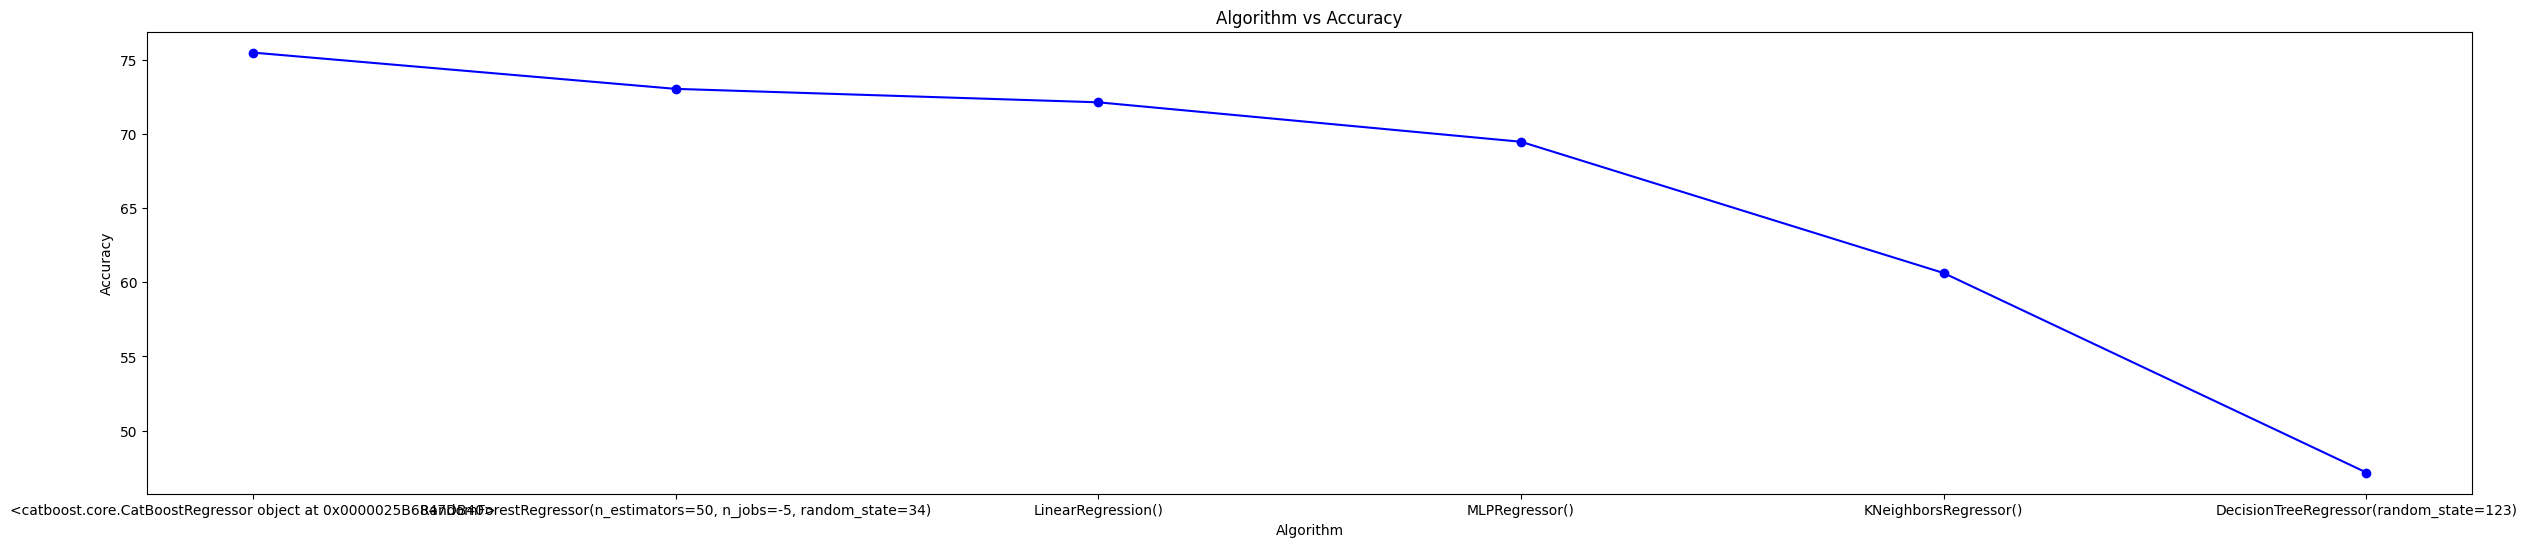

In [93]:
plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(list(d.keys()),list(d.values()),marker='o',color='blue')
plt.show()

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV

In [95]:

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [96]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
    
}

In [97]:
grid = GridSearchCV(estimator=xgb, param_grid = parameters, cv = cv, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constrai...'',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [ ]:
gridcb = GridSearchCV(estimator=cb, param_grid = parameters, cv = cv, n_jobs=-1)
gridcb.fit(x_train, y_train)

In [99]:
gridRand = GridSearchCV(estimator=rf, param_grid = parameters, cv = cv, n_jobs=-1)
gridRand.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestRegressor(n_estimators=50, n_jobs=-5,
                                             random_state=34),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [100]:
gridLGBM = GridSearchCV(estimator=lightgbm, param_grid = parameters, cv = cv, n_jobs=-1)
gridLGBM.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [ ]:
y_predict_random=grid.predict(x_test)
y_predict_rand_cb=gridcb.predict(x_test)
y_predict_random_forest=gridRand.predict(x_test)
y_predict_lightBoost=gridLGBM.predict(x_test)

Before and After Grid search for the top 4 selected models

In [102]:
print("Before Grid Search xg boost:",r2_score(y_test,Y_pred_xgb)*100)
print("After  Grid Search xg boost:",r2_score(y_test,y_predict_random)*100)

print("Before Grid Search cat boost:",r2_score(y_test,Y_pred_cb)*100)
print("After  Grid Search ca:",r2_score(y_test,y_predict_rand_cb)*100)

print("Before Grid Search rf:",r2_score(y_test,Y_pred_rf)*100)
print("After  Grid Search fr:",r2_score(y_test,y_predict_random_forest)*100)

print("Before Grid Search lgm:",r2_score(y_test,Y_pred_lg)*100)
print("After  Grid Search lgb:",r2_score(y_test,y_predict_lightBoost)*100)

Before Grid Search xg boost: 75.15148454623521
After  Grid Search xg boost: 81.63626039329887
Before Grid Search cat boost: 75.46750368968479
After  Grid Search ca: 78.93926423107861
Before Grid Search rf: 73.02383074254644
After  Grid Search fr: 70.87442326288947
Before Grid Search lgm: 74.24641127979879
After  Grid Search lgb: 76.11066325381137


In [103]:
y_train_predict = grid.predict(x_train)

In [104]:
print("XGBoost :", mean_squared_error(y_test,y_predict_random, squared=False))
print(mean_squared_error(y_train, y_train_predict, squared=False))

XGBoost : 6.308358385137063
3.421550704433001


In [105]:
data=[[1,2,1,3,1,0,2,2]]
num= np.array(data)
num

array([[1, 2, 1, 3, 1, 0, 2, 2]])

In [106]:
# x1 = grid.predict(num)
# x1[0]

In [107]:
# x2=xgb.predict(num)
# x2[0]

In [108]:
print("Before Grid Search:",r2_score(y_test,Y_pred_xgb)*100)
print("After  Grid Search:",r2_score(y_test,y_predict_random)*100)

Before Grid Search: 75.15148454623521
After  Grid Search: 81.63626039329887


In [109]:
print('Best Score: %s' % grid.best_score_)

Best Score: 0.6093890102681755


Checking for Overfitting and Under Fitting

In [110]:
print (f'Train Accuracy - : {grid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {grid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.935
Test Accuracy - : 0.816


In [111]:
import pickle

In [112]:
pickle.dump(grid,open('file2.pkl','wb'))